In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [ ]:
data = pd.read_csv("/content/drug200.csv")

In [ ]:
data

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [ ]:
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [ ]:
data.tail()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX
199,40,F,LOW,NORMAL,11.349,drugX


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


Categorical Columns

In [ ]:
data.Drug.value_counts()

Drug
DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: count, dtype: int64

We can see that Drug y as high value count


In [ ]:
data.Cholesterol.value_counts()

Cholesterol
HIGH      103
NORMAL     97
Name: count, dtype: int64

In [ ]:
object_columns = data.select_dtypes(include=['object']).columns
for col in object_columns:
    print(f"Column: {col}")
    print(data[col].value_counts())
    print("================================")


Column: Sex
Sex
M    104
F     96
Name: count, dtype: int64
Column: BP
BP
HIGH      77
LOW       64
NORMAL    59
Name: count, dtype: int64
Column: Cholesterol
Cholesterol
HIGH      103
NORMAL     97
Name: count, dtype: int64
Column: Drug
Drug
DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: count, dtype: int64


Numerical Columns

In [ ]:
data.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [ ]:
skewage = data.Age.skew()
skewage

0.03030835703000607

In [ ]:
skewNa_to_k  = data.Na_to_K.skew()
skewNa_to_k

1.039341186028881

<Axes: xlabel='Age', ylabel='Density'>

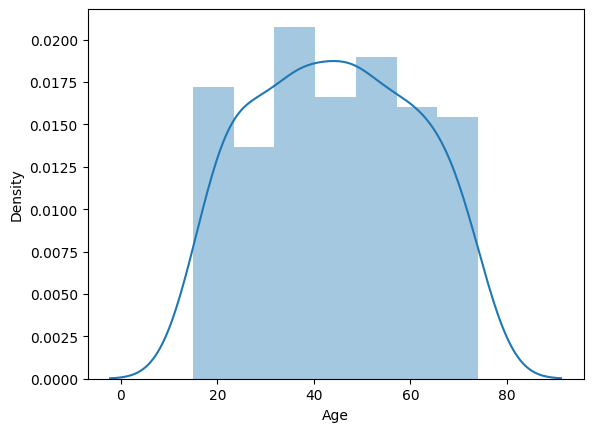

In [ ]:
sns.distplot(data.Age)

<Axes: xlabel='Na_to_K', ylabel='Density'>

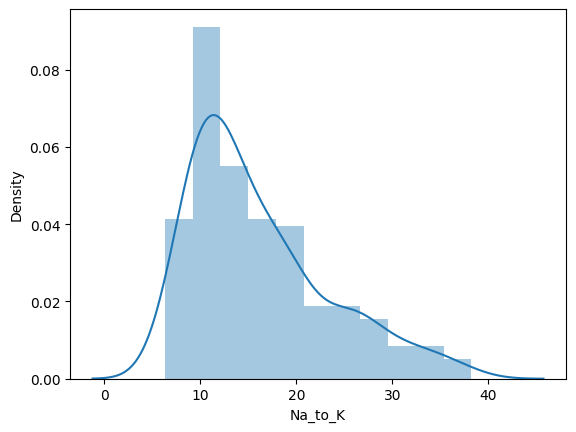

In [ ]:
sns.distplot(data.Na_to_K)

<Axes: xlabel='Age', ylabel='Count'>

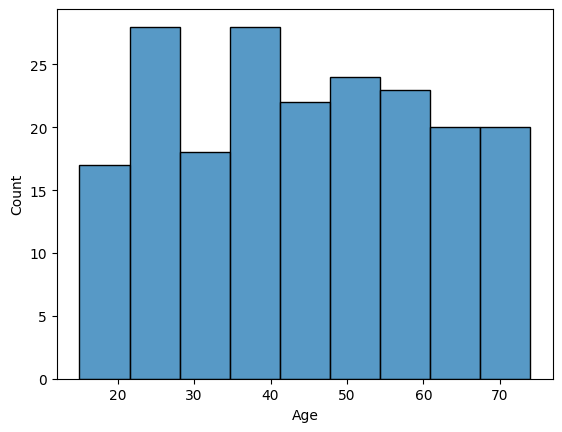

In [ ]:
sns.histplot(data.Age)

<Axes: xlabel='Na_to_K', ylabel='Count'>

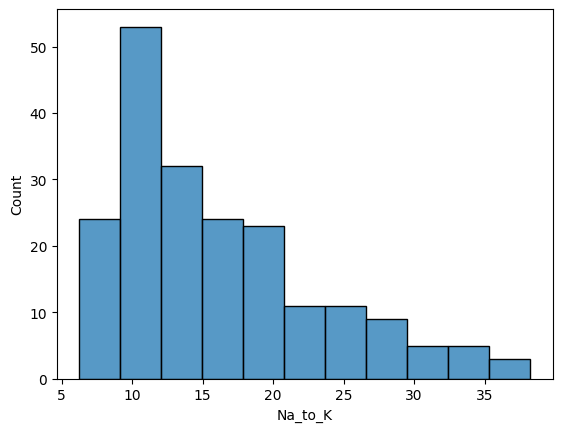

In [ ]:
sns.histplot(data.Na_to_K)

**Drug Distrubution**

<function matplotlib.pyplot.show(close=None, block=None)>

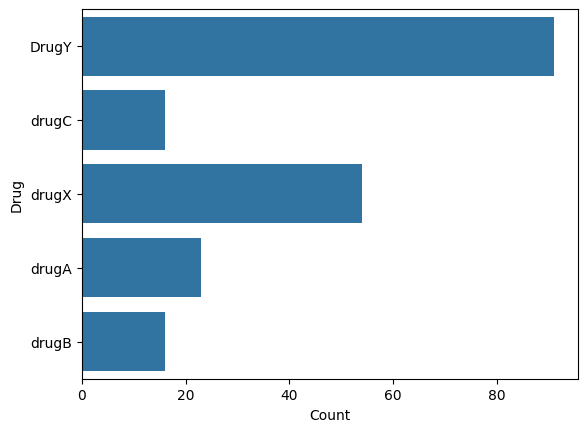

In [ ]:
sns.countplot(y = 'Drug' , data = data)
plt.ylabel('Drug')
plt.xlabel('Count')
plt.show

**Gender Distrubution**

<function matplotlib.pyplot.show(close=None, block=None)>

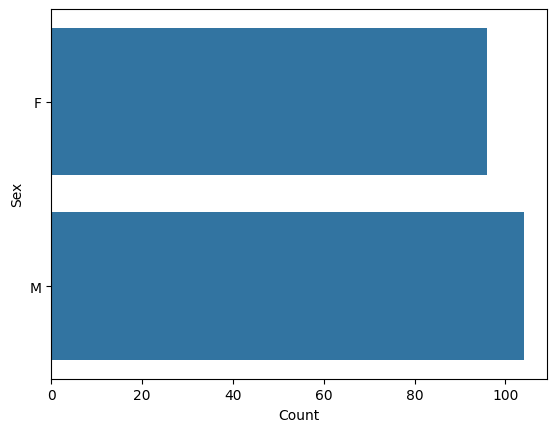

In [ ]:
sns.countplot(y = 'Sex' , data = data)
plt.ylabel('Sex')
plt.xlabel('Count')
plt.show

**Cholesterol Distrubution**

<function matplotlib.pyplot.show(close=None, block=None)>

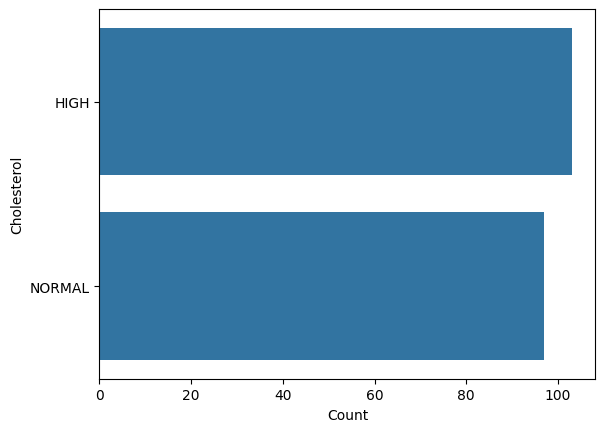

In [ ]:
sns.countplot(y = 'Cholesterol' ,data = data)
plt.ylabel('Cholesterol')
plt.xlabel('Count')
plt.show

**Blood Pressure Distrubution**

<function matplotlib.pyplot.show(close=None, block=None)>

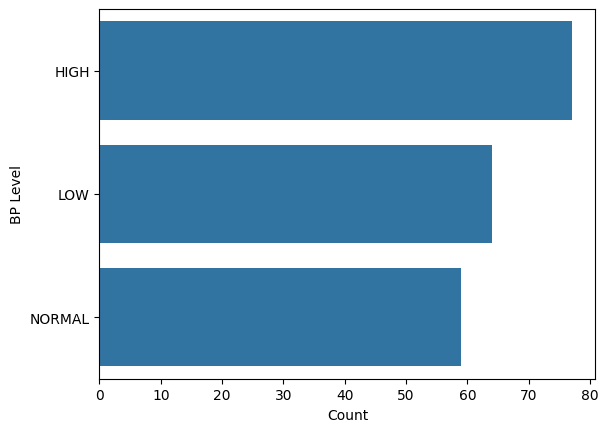

In [ ]:
sns.countplot(y = 'BP'  , data = data)
plt.ylabel('BP Level')
plt.xlabel('Count')
plt.show

**Gender Distribution based on Drug Type**

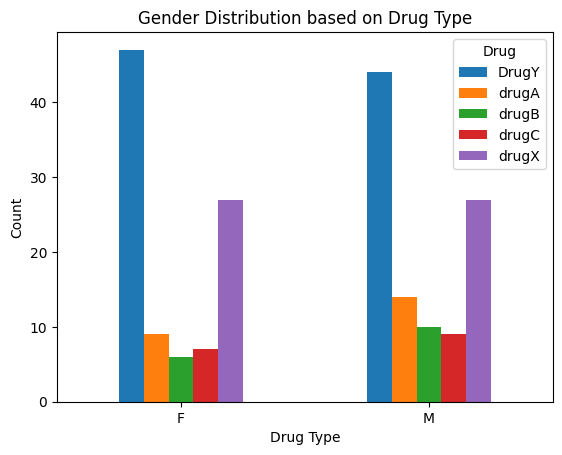

In [ ]:
pd.crosstab(data.Sex , data.Drug).plot(kind ='bar')
plt.title('Gender Distribution based on Drug Type')
plt.xlabel('Drug Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

Blood Pressure  Distribution based on Drug Cholestrol

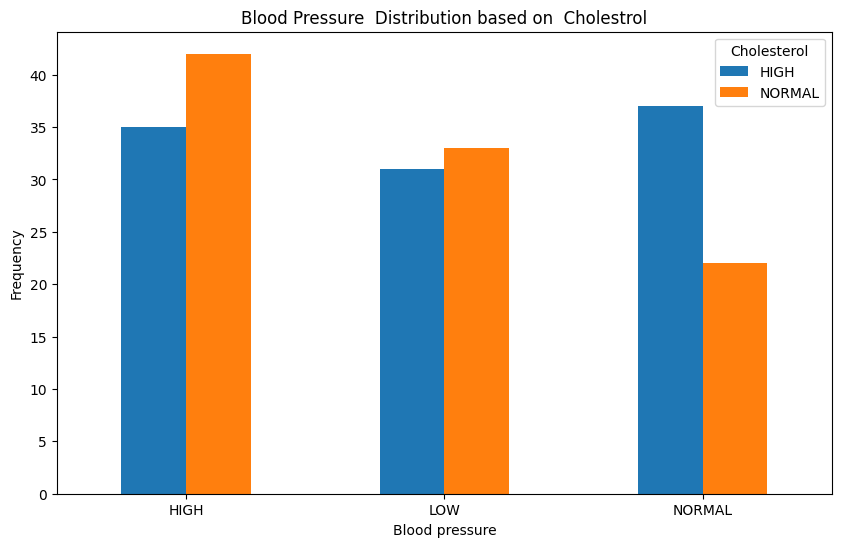

In [ ]:
pd.crosstab(data.BP , data.Cholesterol).plot(kind ='bar',figsize=(10,6))
plt.title('Blood Pressure  Distribution based on  Cholestrol')
plt.xlabel('Blood pressure')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

Sodium to Potassium Distribution based on Gender and Age


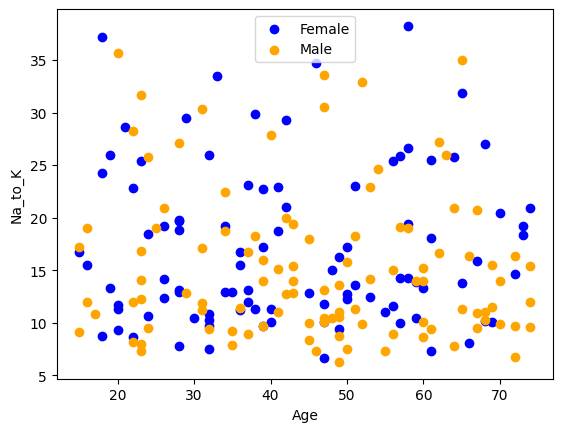

In [ ]:
plt.scatter(x=data.Age[data.Sex=='F'], y=data.Na_to_K[(data.Sex=='F')], c="Blue")
plt.scatter(x=data.Age[data.Sex=='M'], y=data.Na_to_K[(data.Sex=='M')], c="Orange")
plt.legend(["Female", "Male"])
plt.xlabel("Age")
plt.ylabel("Na_to_K")
plt.show()

 **DATA PREPERATION**

DATA BINNING

AGE
👉 The age will be divided into 7 age categories:

Below 20 y.o.

20 - 29 y.o.

30 - 39 y.o.

40 - 49 y.o.

50 - 59 y.o.

60 - 69 y.o.

Above 70.


In [ ]:
age_bins = [0, 19, 29, 39, 49, 59, 69, 80]

In [ ]:
category_age = ['<20s', '20s', '30s', '40s', '50s', '60s', '>60s']

In [ ]:
data['Age_binned'] = pd.cut(data['Age'], bins=age_bins, labels=category_age)
data = data.drop(['Age'], axis = 1)

In [ ]:
data

,Sex,BP,Cholesterol,Na_to_K,Drug,Age_binned
0,F,HIGH,HIGH,25.355,DrugY,20s
1,M,LOW,HIGH,13.093,drugC,40s
2,M,LOW,HIGH,10.114,drugC,40s
3,F,NORMAL,HIGH,7.798,drugX,20s
4,F,LOW,HIGH,18.043,DrugY,60s
...,...,...,...,...,...,...
195,F,LOW,HIGH,11.567,drugC,50s
196,M,LOW,HIGH,12.006,drugC,<20s
197,M,NORMAL,HIGH,9.894,drugX,50s
198,M,NORMAL,NORMAL,14.020,drugX,20s


Na_to_K

👉 The chemical ratio will be divided into 4 categories:

Below 10.

10 - 20.

20 - 30.

Above 30.

In [ ]:
data.Na_to_K.max()

38.247

In [ ]:
data.Na_to_K.min()

6.269

In [ ]:
Na_tok_bins = [0,9,19,29,45]

In [ ]:
category_NatoK = ['<10', '10-20', '20-30', '>30']

In [ ]:
data['NA_to_K_binned'] = pd.cut(data['Na_to_K'], bins=Na_tok_bins, labels=category_NatoK)
data = data.drop(['Na_to_K'], axis = 1)

In [ ]:
data

,Sex,BP,Cholesterol,Drug,Age_binned,NA_to_K_binned
0,F,HIGH,HIGH,DrugY,20s,20-30
1,M,LOW,HIGH,drugC,40s,10-20
2,M,LOW,HIGH,drugC,40s,10-20
3,F,NORMAL,HIGH,drugX,20s,<10
4,F,LOW,HIGH,DrugY,60s,10-20
...,...,...,...,...,...,...
195,F,LOW,HIGH,drugC,50s,10-20
196,M,LOW,HIGH,drugC,<20s,10-20
197,M,NORMAL,HIGH,drugX,50s,10-20
198,M,NORMAL,NORMAL,drugX,20s,10-20


**Feature Engineering**

The FE method that used is one-hot encoding, which is transforming categorical variables into a form that could be provided to ML algorithms to do a better prediction.

In [ ]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False)

Encoding Sex Feature

In [ ]:
encoded_sex = encoder.fit_transform(data[['Sex']])


In [ ]:
encoded_sex = pd.DataFrame(encoded_sex, columns=['Sex_F', 'Sex_M'])

In [ ]:
data = pd.concat([data, encoded_sex], axis=1)
data.drop(['Sex'], axis=1, inplace=True)
data


,BP,Cholesterol,Drug,Age_binned,NA_to_K_binned,Sex_F,Sex_M
0,HIGH,HIGH,DrugY,20s,20-30,1.0,0.0
1,LOW,HIGH,drugC,40s,10-20,0.0,1.0
2,LOW,HIGH,drugC,40s,10-20,0.0,1.0
3,NORMAL,HIGH,drugX,20s,<10,1.0,0.0
4,LOW,HIGH,DrugY,60s,10-20,1.0,0.0
...,...,...,...,...,...,...,...
195,LOW,HIGH,drugC,50s,10-20,1.0,0.0
196,LOW,HIGH,drugC,<20s,10-20,0.0,1.0
197,NORMAL,HIGH,drugX,50s,10-20,0.0,1.0
198,NORMAL,NORMAL,drugX,20s,10-20,0.0,1.0


Encoding Blood Pressure Feature

In [ ]:
encoder_bp = encoder.fit_transform(data[['BP']])
encoder_bp = pd.DataFrame(encoder_bp, columns=['BP_HIGH', 'BP_LOW', 'BP_NORMAL'])
data = pd.concat([data, encoder_bp], axis=1)
data.drop(['BP'], axis=1, inplace=True)
data

,Cholesterol,Drug,Age_binned,NA_to_K_binned,Sex_F,Sex_M,BP_HIGH,BP_LOW,BP_NORMAL
0,HIGH,DrugY,20s,20-30,1.0,0.0,1.0,0.0,0.0
1,HIGH,drugC,40s,10-20,0.0,1.0,0.0,1.0,0.0
2,HIGH,drugC,40s,10-20,0.0,1.0,0.0,1.0,0.0
3,HIGH,drugX,20s,<10,1.0,0.0,0.0,0.0,1.0
4,HIGH,DrugY,60s,10-20,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
195,HIGH,drugC,50s,10-20,1.0,0.0,0.0,1.0,0.0
196,HIGH,drugC,<20s,10-20,0.0,1.0,0.0,1.0,0.0
197,HIGH,drugX,50s,10-20,0.0,1.0,0.0,0.0,1.0
198,NORMAL,drugX,20s,10-20,0.0,1.0,0.0,0.0,1.0


Encoding Cholestrol Feature

In [ ]:
encoder_cholest = encoder.fit_transform(data[['Cholesterol']])
encoder_cholest = pd.DataFrame(encoder_cholest, columns=['Cholesterol_HIGH', 'Cholesterol_NORMAL'])
data = pd.concat([data, encoder_cholest], axis=1)
data.drop(['Cholesterol'], axis=1, inplace=True)
data

,Drug,Age_binned,NA_to_K_binned,Sex_F,Sex_M,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL
0,DrugY,20s,20-30,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,drugC,40s,10-20,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,drugC,40s,10-20,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,drugX,20s,<10,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,DrugY,60s,10-20,1.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
195,drugC,50s,10-20,1.0,0.0,0.0,1.0,0.0,1.0,0.0
196,drugC,<20s,10-20,0.0,1.0,0.0,1.0,0.0,1.0,0.0
197,drugX,50s,10-20,0.0,1.0,0.0,0.0,1.0,1.0,0.0
198,drugX,20s,10-20,0.0,1.0,0.0,0.0,1.0,0.0,1.0


Encoding binned_Age Feature

In [ ]:
encoder_age = encoder.fit_transform(data[['Age_binned']])
encoder_age = pd.DataFrame(encoder_age, columns=['Age_binned_<20s', 'Age_binned_20s', 'Age_binned_30s', 'Age_binned_40s', 'Age_binned_50s', 'Age_binned_60s', 'Age_binned_>60s'])
data = pd.concat([data, encoder_age], axis=1)
data.drop(['Age_binned'], axis=1, inplace=True)
data

,Drug,NA_to_K_binned,Sex_F,Sex_M,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL,Age_binned_<20s,Age_binned_20s,Age_binned_30s,Age_binned_40s,Age_binned_50s,Age_binned_60s,Age_binned_>60s
0,DrugY,20-30,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,drugC,10-20,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,drugC,10-20,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,drugX,<10,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,DrugY,10-20,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,drugC,10-20,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
196,drugC,10-20,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
197,drugX,10-20,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
198,drugX,10-20,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


Encoding NA_to_K Feature

In [ ]:
encoded_Natok = encoder.fit_transform(data[['NA_to_K_binned']])
encoded_Natok = pd.DataFrame(encoded_Natok, columns=['NA_to_K_binned<10', 'NA_to_K_binned10-20', 'NA_to_K_binned20-30', 'NA_to_K_binned>30'])
data = pd.concat([data, encoded_Natok], axis=1)
data.drop(['NA_to_K_binned'], axis=1, inplace=True)
data

,Drug,Sex_F,Sex_M,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL,Age_binned_<20s,Age_binned_20s,Age_binned_30s,Age_binned_40s,Age_binned_50s,Age_binned_60s,Age_binned_>60s,NA_to_K_binned<10,NA_to_K_binned10-20,NA_to_K_binned20-30,NA_to_K_binned>30
0,DrugY,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,drugC,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,drugC,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,drugX,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,DrugY,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,drugC,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
196,drugC,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
197,drugX,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
198,drugX,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


 ** Splitting the dataset **

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
x = data.drop(columns=['Drug'])
y = data['Drug']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

**SMOTE Technique**

Since the number of 'DrugY' is more than other types of drugs, oversampling is carried out to avoid overfitting.

In [ ]:
from imblearn.over_sampling import SMOTE
x_train, y_train = SMOTE().fit_resample(x_train, y_train)

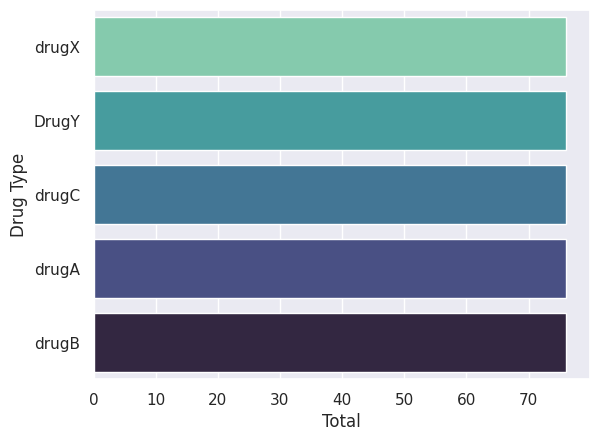

In [ ]:
sns.set_theme(style="darkgrid")
sns.countplot(y=y_train, data=data, palette="mako_r")
plt.ylabel('Drug Type')
plt.xlabel('Total')
plt.show()

SO NOW THE DISTRUBUTION OF DRUG IS BALANCED


**MODEL BUILDING**

Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
LRclassifier = LogisticRegression(solver='liblinear', max_iter=5000)
LRclassifier.fit(x_train, y_train)



LogisticRegression(max_iter=5000, solver='liblinear')

In [ ]:
y_pred = LRclassifier.predict(x_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
LRAcc = accuracy_score(y_pred,y_test)
print('Logistic Regression accuracy is: {:.2f}%'.format(LRAcc*100))

              precision    recall  f1-score   support

       DrugY       1.00      0.80      0.89        15
       drugA       0.86      1.00      0.92         6
       drugB       0.75      1.00      0.86         3
       drugC       0.83      1.00      0.91         5
       drugX       1.00      1.00      1.00        11

    accuracy                           0.93        40
   macro avg       0.89      0.96      0.92        40
weighted avg       0.94      0.93      0.92        40

[[12  1  1  1  0]
 [ 0  6  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0  5  0]
 [ 0  0  0  0 11]]
Logistic Regression accuracy is: 92.50%


KNN MODEL

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knclassifer = KNeighborsClassifier(n_neighbors=10)
knclassifer.fit(x_train, y_train)
y_pred = knclassifer.predict(x_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
KNNAcc = accuracy_score(y_pred,y_test)
print('KNN accuracy is: {:.2f}%'.format(KNNAcc*100))

              precision    recall  f1-score   support

       DrugY       1.00      0.47      0.64        15
       drugA       0.71      0.83      0.77         6
       drugB       0.60      1.00      0.75         3
       drugC       0.83      1.00      0.91         5
       drugX       0.73      1.00      0.85        11

    accuracy                           0.78        40
   macro avg       0.78      0.86      0.78        40
weighted avg       0.83      0.78      0.76        40

[[ 7  2  1  1  4]
 [ 0  5  1  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0  5  0]
 [ 0  0  0  0 11]]
KNN accuracy is: 77.50%


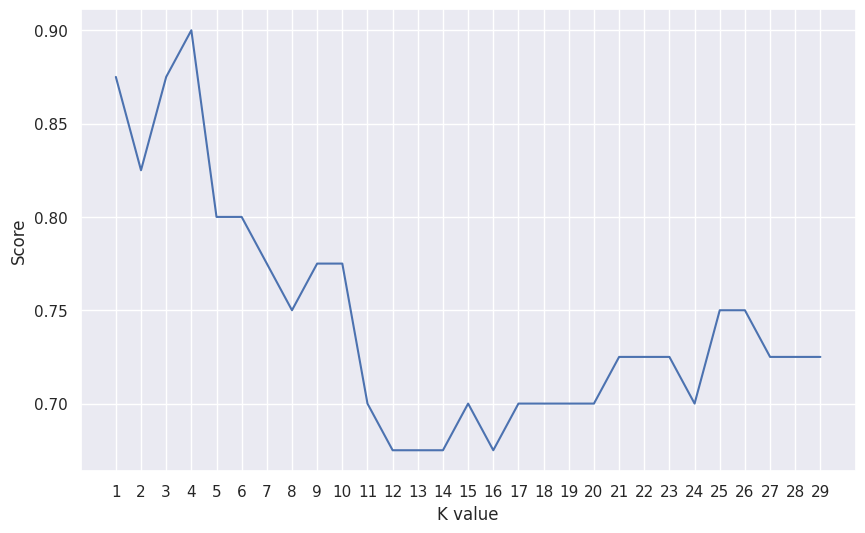

KNN Acc Max 90.00%


In [ ]:
scoreListknn = []
for i in range(1,30):
    KNclassifier = KNeighborsClassifier(n_neighbors = i)
    KNclassifier.fit(x_train, y_train)
    scoreListknn.append(KNclassifier.score(x_test, y_test))
plt.figure(figsize=(10,6))
plt.plot(range(1,30), scoreListknn)
plt.xticks(np.arange(1,30,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()
KNAccMax = max(scoreListknn)
print("KNN Acc Max {:.2f}%".format(KNAccMax*100))

Support Vector Machine (SVM)

In [ ]:
from sklearn.svm import SVC
SVCclassifier = SVC(kernel='linear',gamma= 'scale', max_iter=251)
SVCclassifier.fit(x_train, y_train)
y_pred = SVCclassifier.predict(x_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
SVMAcc = accuracy_score(y_pred,y_test)
print('SVM accuracy is: {:.2f}%'.format(SVMAcc*100))

              precision    recall  f1-score   support

       DrugY       0.93      0.87      0.90        15
       drugA       1.00      0.83      0.91         6
       drugB       0.75      1.00      0.86         3
       drugC       0.83      1.00      0.91         5
       drugX       1.00      1.00      1.00        11

    accuracy                           0.93        40
   macro avg       0.90      0.94      0.91        40
weighted avg       0.93      0.93      0.93        40

[[13  0  1  1  0]
 [ 1  5  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0  5  0]
 [ 0  0  0  0 11]]
SVM accuracy is: 92.50%


 **Naive Bayes**

Categorical NB

In [ ]:
from sklearn.naive_bayes import CategoricalNB
Nbclassifier = CategoricalNB()
Nbclassifier.fit(x_train, y_train)
y_pred = Nbclassifier.predict(x_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
NBCacc = accuracy_score(y_pred,y_test)
print('Naive Bayes accuracy is: {:.2f}%'.format(NBCacc*100))

              precision    recall  f1-score   support

       DrugY       1.00      0.80      0.89        15
       drugA       0.83      0.83      0.83         6
       drugB       0.60      1.00      0.75         3
       drugC       0.80      0.80      0.80         5
       drugX       0.92      1.00      0.96        11

    accuracy                           0.88        40
   macro avg       0.83      0.89      0.85        40
weighted avg       0.90      0.88      0.88        40

[[12  1  1  1  0]
 [ 0  5  1  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0  4  1]
 [ 0  0  0  0 11]]
Naive Bayes accuracy is: 87.50%


 Gaussian NB

In [ ]:
from sklearn.naive_bayes import GaussianNB
Gnbclassifier = GaussianNB()
Gnbclassifier.fit(x_train, y_train)
y_pred = Gnbclassifier.predict(x_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
GNBAcc = accuracy_score(y_pred,y_test)
print('Gaussian NB accuracy is: {:.2f}%'.format(GNBAcc*100))

              precision    recall  f1-score   support

       DrugY       0.93      0.87      0.90        15
       drugA       1.00      0.83      0.91         6
       drugB       0.75      1.00      0.86         3
       drugC       1.00      0.80      0.89         5
       drugX       0.85      1.00      0.92        11

    accuracy                           0.90        40
   macro avg       0.90      0.90      0.89        40
weighted avg       0.91      0.90      0.90        40

[[13  0  1  0  1]
 [ 1  5  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0  4  1]
 [ 0  0  0  0 11]]
Gaussian NB accuracy is: 90.00%


 **Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
Dtclassifier = DecisionTreeClassifier()
Dtclassifier.fit(x_train, y_train)
y_pred = Dtclassifier.predict(x_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
DTAcc = accuracy_score(y_pred,y_test)
print('Decision Tree accuracy is: {:.2f}%'.format(DTAcc*100))

              precision    recall  f1-score   support

       DrugY       0.82      0.93      0.87        15
       drugA       1.00      0.67      0.80         6
       drugB       1.00      1.00      1.00         3
       drugC       0.80      0.80      0.80         5
       drugX       1.00      1.00      1.00        11

    accuracy                           0.90        40
   macro avg       0.92      0.88      0.89        40
weighted avg       0.91      0.90      0.90        40

[[14  0  0  1  0]
 [ 2  4  0  0  0]
 [ 0  0  3  0  0]
 [ 1  0  0  4  0]
 [ 0  0  0  0 11]]
Decision Tree accuracy is: 90.00%


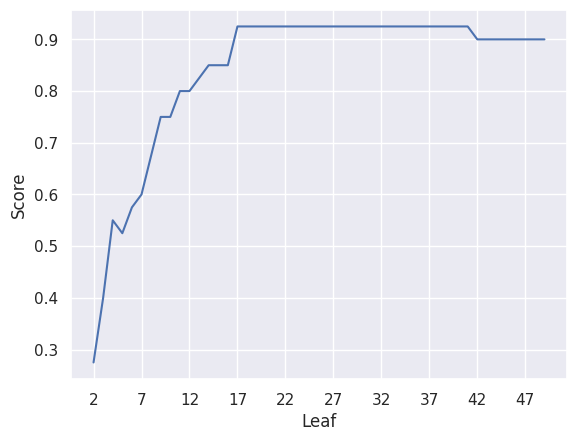

DT Acc Max 92.50%


In [ ]:
scoreListDT = []
for i in range(2,50):
    DTclassifier = DecisionTreeClassifier(max_leaf_nodes=i)
    DTclassifier.fit(x_train, y_train)
    scoreListDT.append(DTclassifier.score(x_test, y_test))

plt.plot(range(2,50), scoreListDT)
plt.xticks(np.arange(2,50,5))
plt.xlabel("Leaf")
plt.ylabel("Score")
plt.show()
DTAccMax = max(scoreListDT)
print("DT Acc Max {:.2f}%".format(DTAccMax*100))

** Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
Rfclassifier = RandomForestClassifier()
Rfclassifier.fit(x_train, y_train)
y_pred = Rfclassifier.predict(x_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
RFAcc = accuracy_score(y_pred,y_test)
print('Random Forest accuracy is: {:.2f}%'.format(RFAcc*100))

              precision    recall  f1-score   support

       DrugY       0.88      0.93      0.90        15
       drugA       1.00      0.83      0.91         6
       drugB       0.75      1.00      0.86         3
       drugC       1.00      0.80      0.89         5
       drugX       1.00      1.00      1.00        11

    accuracy                           0.93        40
   macro avg       0.93      0.91      0.91        40
weighted avg       0.93      0.93      0.93        40

[[14  0  1  0  0]
 [ 1  5  0  0  0]
 [ 0  0  3  0  0]
 [ 1  0  0  4  0]
 [ 0  0  0  0 11]]
Random Forest accuracy is: 92.50%


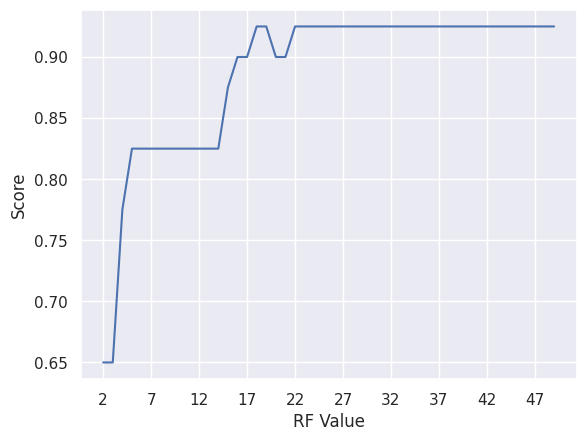

RF Acc Max 92.50%


In [ ]:
scoreListRF = []
for i in range(2,50):
    RFclassifier = RandomForestClassifier(n_estimators = 1000, random_state = 1, max_leaf_nodes=i)
    RFclassifier.fit(x_train, y_train)
    scoreListRF.append(RFclassifier.score(x_test, y_test))

plt.plot(range(2,50), scoreListRF)
plt.xticks(np.arange(2,50,5))
plt.xlabel("RF Value")
plt.ylabel("Score")
plt.show()
RFAccMax = max(scoreListRF)
print("RF Acc Max {:.2f}%".format(RFAccMax*100))

**Model Comparison**

In [ ]:
compare = pd.DataFrame({'Model': ['Logistic Regression', 'K Neighbors', 'K Neighbors Max','SVM', 'Categorical NB',
                                  'Gaussian NB', 'Decision Tree', 'Decision Tree Max', 'Random Forest', 'Random Forest Max'],
                        'Accuracy': [LRAcc*100, KNNAcc*100, KNAccMax*100, SVMAcc*100, NBCacc*100, GNBAcc*100, DTAcc*100, DTAccMax*100, RFAcc*100, RFAccMax*100]})
compare.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
0,Logistic Regression,92.5
3,SVM,92.5
7,Decision Tree Max,92.5
8,Random Forest,92.5
9,Random Forest Max,92.5
2,K Neighbors Max,90.0
5,Gaussian NB,90.0
6,Decision Tree,90.0
4,Categorical NB,87.5
1,K Neighbors,77.5


In [ ]:
pred_lr = Nbclassifier.predict(x_test)


In [ ]:
prediction = pd.DataFrame({'Sex_F': x_test.loc[:,"Sex_F"],
                           'Sex_M': x_test.loc[:,"Sex_M"],
                           'BP_HIGH': x_test.loc[:,"BP_HIGH"],
                           'BP_LOW': x_test.loc[:,"BP_LOW"],
                           'BP_NORMAL': x_test.loc[:,"BP_NORMAL"],
                           'Cholesterol_HIGH': x_test.loc[:,"Cholesterol_HIGH"],
                           'Cholesterol_NORMAL': x_test.loc[:,"Cholesterol_NORMAL"],
                           'Age_binned_<20s': x_test.loc[:,"Age_binned_<20s"],
                           'Age_binned_20s': x_test.loc[:,"Age_binned_20s"],   'Age_binned_30s': x_test.loc[:,"Age_binned_30s"],
                           'Age_binned_40s': x_test.loc[:,"Age_binned_40s"],
                           'Age_binned_50s': x_test.loc[:,"Age_binned_50s"],
                           'Age_binned_60s': x_test.loc[:,"Age_binned_60s"],
                           'Age_binned_>60s': x_test.loc[:,"Age_binned_>60s"],
                           'NA_to_K_binned<10': x_test.loc[:,"NA_to_K_binned<10"],
                           'NA_to_K_binned10-20': x_test.loc[:,"NA_to_K_binned10-20"],
                           'NA_to_K_binned20-30': x_test.loc[:,"NA_to_K_binned20-30"],'NA_to_K_binned>30': x_test.loc[:,"NA_to_K_binned>30"],'DrugType': pred_lr})

In [ ]:
# Sex
prediction['Sex_F'] = prediction['Sex_F'].replace([1, 0],['Female', 'Male'])

#BP
prediction['BP_HIGH'] = prediction['BP_HIGH'].replace([1, 0],['High',''])
prediction['BP_LOW'] = prediction['BP_LOW'].replace([1, 0],['Low', ''])
prediction['BP_NORMAL'] = prediction['BP_NORMAL'].replace([1, 0],['Normal', ''])

prediction['BP_HIGH'] = np.where((prediction['BP_HIGH'] == ''), prediction['BP_LOW'], prediction['BP_HIGH'])
prediction['BP_HIGH'] = np.where((prediction['BP_HIGH'] == ''), prediction['BP_NORMAL'], prediction['BP_HIGH'])

#Cholestrol
prediction['Cholesterol_HIGH'] = prediction['Cholesterol_HIGH'].replace([1, 0],['High', 'Normal'])

#Age_binned
prediction['Age_binned_<20s'] = prediction['Age_binned_<20s'].replace([1, 0],['<20s',''])
prediction['Age_binned_20s'] = prediction['Age_binned_20s'].replace([1, 0],['20s',''])
prediction['Age_binned_30s'] = prediction['Age_binned_30s'].replace([1, 0],['30s',''])
prediction['Age_binned_40s'] = prediction['Age_binned_40s'].replace([1, 0],['40s',''])
prediction['Age_binned_50s'] = prediction['Age_binned_50s'].replace([1, 0],['50s',''])
prediction['Age_binned_60s'] = prediction['Age_binned_60s'].replace([1, 0],['60s',''])
prediction['Age_binned_>60s'] = prediction['Age_binned_>60s'].replace([1, 0],['>60s',''])

prediction['Age_binned_<20s'] = np.where((prediction['Age_binned_<20s'] == ''), prediction['Age_binned_20s'], prediction['Age_binned_<20s'])
prediction['Age_binned_<20s'] = np.where((prediction['Age_binned_<20s'] == ''), prediction['Age_binned_30s'], prediction['Age_binned_<20s'])
prediction['Age_binned_<20s'] = np.where((prediction['Age_binned_<20s'] == ''), prediction['Age_binned_40s'], prediction['Age_binned_<20s'])
prediction['Age_binned_<20s'] = np.where((prediction['Age_binned_<20s'] == ''), prediction['Age_binned_50s'], prediction['Age_binned_<20s'])
prediction['Age_binned_<20s'] = np.where((prediction['Age_binned_<20s'] == ''), prediction['Age_binned_60s'], prediction['Age_binned_<20s'])
prediction['Age_binned_<20s'] = np.where((prediction['Age_binned_<20s'] == ''), prediction['Age_binned_>60s'], prediction['Age_binned_<20s'])

#Na to K
prediction['NA_to_K_binned<10'] = prediction['NA_to_K_binned<10'].replace([1, 0],['<10',''])
prediction['NA_to_K_binned10-20'] = prediction['NA_to_K_binned10-20'].replace([1, 0],['10-20',''])
prediction['NA_to_K_binned20-30'] = prediction['NA_to_K_binned20-30'].replace([1, 0],['20-30',''])
prediction['NA_to_K_binned>30'] = prediction['NA_to_K_binned>30'].replace([1, 0],['>30s',''])

prediction['NA_to_K_binned<10'] = np.where((prediction['NA_to_K_binned<10'] == ''), prediction['NA_to_K_binned10-20'], prediction['NA_to_K_binned<10'])
prediction['NA_to_K_binned<10'] = np.where((prediction['NA_to_K_binned<10'] == ''), prediction['NA_to_K_binned20-30'], prediction['NA_to_K_binned<10'])
prediction['NA_to_K_binned<10'] = np.where((prediction['NA_to_K_binned<10'] == ''), prediction['NA_to_K_binned>30'], prediction['NA_to_K_binned<10'])

In [ ]:
# Drop columns
prediction = prediction.drop(['Sex_M', 'BP_LOW', 'BP_NORMAL', 'Cholesterol_NORMAL', 'Age_binned_20s', 'Age_binned_30s',
                 'Age_binned_40s', 'Age_binned_50s', 'Age_binned_60s', 'Age_binned_>60s',
                'NA_to_K_binned10-20', 'NA_to_K_binned20-30', 'NA_to_K_binned>30'], axis = 1)

In [ ]:
# Rename columns name
new_name = {'Sex_F': 'Sex', 'BP_HIGH': 'BP', 'Cholesterol_HIGH': 'Cholesterol', 'Age_binned_<20s': 'Age_binned',
          'NA_to_K_binned<10': 'NA_to_K_binned'}
prediction.rename(columns=new_name, inplace=True)

**Generating output file (CSV)**

In [ ]:
 prediction.to_csv('prediction.csv', index=False)
predictioncsv = pd.read_csv('./prediction.csv')
predictioncsv.head()

,Sex,BP,Cholesterol,Age_binned,NA_to_K_binned,DrugType
0,Male,Low,Normal,20s,<10,drugX
1,Female,High,Normal,60s,<10,drugA
2,Female,Normal,Normal,60s,20-30,drugX
3,Female,Low,High,40s,<10,drugC
4,Male,Low,Normal,30s,>30s,DrugY
